In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb() #this is needed for SQL Alchemy because they need a MySQL Library 
from config import key

### Store CSV into DataFrame and clean data 

The databases/df below were divided mantaining same order from original source. To review more detailg please go to https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)


# mortality7

In [2]:
#import csv file
csv_file = "../Resources/morticd07/MortIcd7.csv"
df7 = pd.read_csv(csv_file)
df7.head()

,"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"
0,"1125,,,1955,07A,A000,1,01,08,107822,40543,1881..."
1,"1125,,,1955,07A,A000,2,01,08,105750,39632,2160..."
2,"1125,,,1955,07A,A001,1,01,08,1302,6,14,17,12,1..."
3,"1125,,,1955,07A,A001,2,01,08,739,4,16,13,17,10..."
4,"1125,,,1955,07A,A002,1,01,08,69,7,13,4,9,5,13,..."


In [3]:
# check columns name
df7.columns

Index(['Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4'], dtype='object')

In [4]:
# rename only column to "All"
df7.rename(columns={"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4":"All"}, inplace = True)

In [5]:
# new data frame with split value columns 
df7 = df7["All"].str.split(",", n = 50, expand = True) 
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1125,,,1955,07A,A000,1,01,08,107822,...,2013,2727,4126,,,214,40543,,,
1,1125,,,1955,07A,A000,2,01,08,105750,...,1745,3465,5963,,,82,39632,,,
2,1125,,,1955,07A,A001,1,01,08,1302,...,8,6,2,,,1,6,,,
3,1125,,,1955,07A,A001,2,01,08,739,...,2,1,2,,,0,4,,,
4,1125,,,1955,07A,A002,1,01,08,69,...,0,0,0,,,0,7,,,


In [6]:
# mortality7 years from 1950 - 1972
df7.sort_values(3,ascending= True).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
264443,5150,,,1950,07A,A083,1,01,08,289,...,54,40,21,,,0,0,,,
89349,3150,901,,1950,07A,A004,1,03,08,1,...,0,,,,,0,0,,,
89350,3150,901,,1950,07A,A004,2,03,08,3,...,1,,,,,0,0,,,
89351,3150,901,,1950,07A,A005,1,03,08,5,...,0,,,,,0,1,,,
89352,3150,901,,1950,07A,A005,2,03,08,5,...,0,,,,,0,1,,,


In [7]:
# Rename columns
df7.rename(columns=
                         {0:"country_code", 
                          3:"year", 
                          5:"cause",
                          6:"sex",
                          9:"total_d"}, 
                         inplace = True)
df7.head()

,country_code,1,2,year,4,cause,sex,7,8,total_d,...,29,30,31,32,33,34,35,36,37,38
0,1125,,,1955,07A,A000,1,01,08,107822,...,2013,2727,4126,,,214,40543,,,
1,1125,,,1955,07A,A000,2,01,08,105750,...,1745,3465,5963,,,82,39632,,,
2,1125,,,1955,07A,A001,1,01,08,1302,...,8,6,2,,,1,6,,,
3,1125,,,1955,07A,A001,2,01,08,739,...,2,1,2,,,0,4,,,
4,1125,,,1955,07A,A002,1,01,08,69,...,0,0,0,,,0,7,,,


In [8]:
# check class of information contained in the df 
df7.dtypes

country_code    object
1               object
2               object
year            object
4               object
cause           object
sex             object
7               object
8               object
total_d         object
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [9]:
# Change column's type 
df7["total_d"]= df7["total_d"].astype(str).astype(int)
df7["year"]= df7["year"].astype(str).astype(int)
df7["cause"]= df7.cause.astype(str)

In [10]:
# review changes
df7.dtypes

country_code    object
1               object
2               object
year             int32
4               object
cause           object
sex             object
7               object
8               object
total_d          int32
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [11]:
# create new df  
new_df7 = pd.DataFrame()

# Select and fill new df with columns to use for analysis and plotting 
new_df7["year"] = df7["year"]
new_df7["total_death"] = df7["total_d"]
new_df7["cause"] = df7["cause"]

new_df7.head()

,year,total_death,cause
0,1955,107822,A000
1,1955,105750,A000
2,1955,1302,A001
3,1955,739,A001
4,1955,69,A002


In [12]:
# set index to df
new_df7.set_index("cause").head()

,year,total_death
cause,,
A000,1955,107822
A000,1955,105750
A001,1955,1302
A001,1955,739
A002,1955,69


In [13]:
# filter by suicide code for the corresponding table
# (to see more details, go to documentation in https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)
new_df7_1 = new_df7.loc[new_df7["cause"]=="A148",:]
new_df7_1.head()

,year,total_death,cause
286,1955,12,A148
287,1955,8,A148
578,1956,12,A148
579,1956,5,A148
870,1957,6,A148


In [14]:
# another code for suicide in the same table
new_df7_2 = new_df7.loc[new_df7["cause"]=="B049",:]
new_df7_2.head()

,year,total_death,cause
270755,1954,11,B049
270756,1954,2,B049
270855,1957,29,B049
270856,1957,6,B049
270955,1958,27,B049


In [15]:
# merge tables
merge1 = pd.merge(new_df7_1,new_df7_2, on="year", how="outer")
merge1.tail()

,year,total_death_x,cause_x,total_death_y,cause_y
19065,1970,168,A148,33.0,B049
19066,1971,125,A148,NaN,NaN
19067,1971,115,A148,NaN,NaN
19068,1972,171,A148,NaN,NaN
19069,1972,78,A148,NaN,NaN


# mortality8

In [16]:
#import csv file
csv_file = "../Resources/morticd08/MortIcd8.csv"
df8 = pd.read_csv(csv_file)
df8.head()

,"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"
0,"1060,,,1980,08A,A000,1,07,08,1087,375,132,,,,3..."
1,"1060,,,1980,08A,A000,2,07,08,1194,313,133,,,,4..."
2,"1060,,,1980,08A,A001,1,07,08,0,0,0,,,,0,,0,,0,..."
3,"1060,,,1980,08A,A001,2,07,08,0,0,0,,,,0,,0,,0,..."
4,"1060,,,1980,08A,A002,1,07,08,4,0,1,,,,0,,1,,2,..."


In [17]:
df8 = df8["Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"].str.split(",", n = 50, expand = True) 
df8.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1060,,,1980,08A,A000,1,07,08,1087,...,161,,,,,0,375,,,
1,1060,,,1980,08A,A000,2,07,08,1194,...,335,,,,,0,313,,,
2,1060,,,1980,08A,A001,1,07,08,0,...,0,,,,,0,0,,,
3,1060,,,1980,08A,A001,2,07,08,0,...,0,,,,,0,0,,,
4,1060,,,1980,08A,A002,1,07,08,4,...,0,,,,,0,0,,,


In [18]:
# rename columns
df8.rename(columns= {0:"country_code", 
                          3:"year", 
                          4:"list",
                          5:"cause",
                          6:"sex",
                          9:"total_d"}, 
                         inplace = True)
df8.head()

,country_code,1,2,year,list,cause,sex,7,8,total_d,...,29,30,31,32,33,34,35,36,37,38
0,1060,,,1980,08A,A000,1,07,08,1087,...,161,,,,,0,375,,,
1,1060,,,1980,08A,A000,2,07,08,1194,...,335,,,,,0,313,,,
2,1060,,,1980,08A,A001,1,07,08,0,...,0,,,,,0,0,,,
3,1060,,,1980,08A,A001,2,07,08,0,...,0,,,,,0,0,,,
4,1060,,,1980,08A,A002,1,07,08,4,...,0,,,,,0,0,,,


In [19]:
# check class of information contained in the df 
df8.dtypes

country_code    object
1               object
2               object
year            object
list            object
cause           object
sex             object
7               object
8               object
total_d         object
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [20]:
# change column's type 
df8["total_d"]= df8["total_d"].astype(str).astype(int)
df8["year"]= df8["year"].astype(str).astype(int)
df8["cause"]= df8.cause.astype(str)

In [21]:
# review changes
df8.dtypes


country_code    object
1               object
2               object
year             int32
list            object
cause           object
sex             object
7               object
8               object
total_d          int32
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [22]:
# create new df with the columns that we will join and plot 
new_df8 = pd.DataFrame()

In [23]:
# Select and fill new df with columns to use for analysis and plotting 
new_df8["year"] = df8["year"]
new_df8["total_death"] = df8["total_d"]
new_df8["cause"] = df8["cause"]

new_df8.head()

,year,total_death,cause
0,1980,1087,A000
1,1980,1194,A000
2,1980,0,A001
3,1980,0,A001
4,1980,4,A002


In [24]:
# set index to df
new_df8.set_index("cause").head()

,year,total_death
cause,,
A000,1980,1087
A000,1980,1194
A001,1980,0
A001,1980,0
A002,1980,4


In [25]:
# filter by suicide code for the corresponding table
# (to see more details, go to documentation in https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)
new_df8_1 = new_df8.loc[new_df8["cause"]=="A147",:]
new_df8_1.head()

,year,total_death,cause
283,1980,6,A147
284,1980,1,A147
1429,1973,17,A147
1430,1973,15,A147
1720,1974,14,A147


In [26]:
# other code for suicide inside same table
new_df8_2 = new_df8.loc[new_df8["cause"]=="B049",:]
new_df8_2.head()

,year,total_death,cause
377158,1974,0,B049
377159,1974,0,B049
377257,1976,0,B049
377258,1976,0,B049
377356,1977,0,B049


In [27]:
# merge tables 
merge2 = pd.merge(new_df8_1,new_df8_2, on="year", how="outer")
merge2.head()

,year,total_death_x,cause_x,total_death_y,cause_y
0,1980,6,A147,NaN,NaN
1,1980,1,A147,NaN,NaN
2,1980,23,A147,NaN,NaN
3,1980,0,A147,NaN,NaN
4,1980,36,A147,NaN,NaN


In [28]:
# merge tables 1 and 2
merge_a = pd.merge(merge1,merge2, on="year", how="outer")
merge_a.head()

,year,total_death_x_x,cause_x_x,total_death_y_x,cause_y_x,total_death_x_y,cause_x_y,total_death_y_y,cause_y_y
0,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN
1,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN
2,1955,12.0,A148,179.0,B049,NaN,NaN,NaN,NaN
3,1955,12.0,A148,72.0,B049,NaN,NaN,NaN,NaN
4,1955,12.0,A148,58.0,B049,NaN,NaN,NaN,NaN


# mortality9

In [29]:
#import csv file
csv_file = "../Resources/morticd09/MortIcd9.csv"
df9 = pd.read_csv(csv_file)
df9.head()

,"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"
0,"2005,,,1983,09A,B00,1,01,01,36,0,0,0,0,0,0,0,1..."
1,"2005,,,1983,09A,B00,2,01,01,37,1,1,0,0,0,0,0,0..."
2,"2005,,,1983,09A,B01,1,01,01,1,0,0,0,0,0,0,0,0,..."
3,"2005,,,1983,09A,B01,2,01,01,0,0,0,0,0,0,0,0,0,..."
4,"2005,,,1983,09A,B010,1,01,01,0,0,0,0,0,0,0,0,0..."


In [30]:
df9 = df9["Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"].str.split(",", n = 50, expand = True) 
df9.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2005,,,1983,09A,B00,1,01,01,36,...,11,5,4,,,1,0,0,0,0
1,2005,,,1983,09A,B00,2,01,01,37,...,2,5,10,,,0,0,0,1,0
2,2005,,,1983,09A,B01,1,01,01,1,...,0,0,0,,,0,0,0,0,0
3,2005,,,1983,09A,B01,2,01,01,0,...,0,0,0,,,0,0,0,0,0
4,2005,,,1983,09A,B010,1,01,01,0,...,0,0,0,,,0,0,0,0,0


In [31]:
# mortality9 years from 1979 - 2013
df9.sort_values(3,ascending=True).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
287803,3150,,,1979,09B,B012,2,01,08,2,...,1,0,1,,,0,0,,,
620156,4200,,,1979,09B,B48,2,01,01,1,...,0,0,0,,,0,0,0,0,1
620157,4200,,,1979,09B,B480,1,01,01,0,...,0,0,0,,,0,0,0,0,0
620158,4200,,,1979,09B,B480,2,01,01,0,...,0,0,0,,,0,0,0,0,0
620159,4200,,,1979,09B,B481,1,01,01,0,...,0,0,0,,,0,0,0,0,0


In [32]:
df9.rename(columns={0:"country_code", 
                          3:"year", 
                          4:"list",
                          5:"cause",
                          6:"sex",
                          9:"total_d"}, 
                         inplace = True)
df9.head()

,country_code,1,2,year,list,cause,sex,7,8,total_d,...,29,30,31,32,33,34,35,36,37,38
0,2005,,,1983,09A,B00,1,01,01,36,...,11,5,4,,,1,0,0,0,0
1,2005,,,1983,09A,B00,2,01,01,37,...,2,5,10,,,0,0,0,1,0
2,2005,,,1983,09A,B01,1,01,01,1,...,0,0,0,,,0,0,0,0,0
3,2005,,,1983,09A,B01,2,01,01,0,...,0,0,0,,,0,0,0,0,0
4,2005,,,1983,09A,B010,1,01,01,0,...,0,0,0,,,0,0,0,0,0


In [33]:
# check class of information contained in the df 
df9.dtypes

country_code    object
1               object
2               object
year            object
list            object
cause           object
sex             object
7               object
8               object
total_d         object
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [34]:
# Change column's type 
df9["total_d"]= df9["total_d"].astype(str).astype(int)
df9["year"]= df9["year"].astype(str).astype(int)
df9["cause"]= df9.cause.astype(str)

In [35]:
# review changes
df9.dtypes

country_code    object
1               object
2               object
year             int32
list            object
cause           object
sex             object
7               object
8               object
total_d          int32
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [36]:
# create new df with the columns that we will join and plot 
new_df9 = pd.DataFrame()

In [37]:
# select and fill new df with columns to use for analysis and plotting 
new_df9["year"] = df9["year"]
new_df9["total_death"] = df9["total_d"]
new_df9["cause"] = df9["cause"]

new_df9.head()

,year,total_death,cause
0,1983,36,B00
1,1983,37,B00
2,1983,1,B01
3,1983,0,B01
4,1983,0,B010


In [38]:
# set index to df
new_df9.set_index("cause").head()

,year,total_death
cause,,
B00,1983,36
B00,1983,37
B01,1983,1
B01,1983,0
B010,1983,0


In [39]:
# filter by suicide code for the corresponding table
# (to see more details, go to documentation in https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)
new_df9_1 = new_df9.loc[new_df9["cause"]=="B54",:]
new_df9_1.head()

,year,total_death,cause
324,1983,0,B54
325,1983,0,B54
660,1984,0,B54
661,1984,0,B54
996,1985,0,B54


In [40]:
# merge tables
merge_b = pd.merge(merge_a,new_df9_1, on="year", how="outer")
merge_b.head()

,year,total_death_x_x,cause_x_x,total_death_y_x,cause_y_x,total_death_x_y,cause_x_y,total_death_y_y,cause_y_y,total_death,cause
0,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,12.0,A148,179.0,B049,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,12.0,A148,72.0,B049,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,12.0,A148,58.0,B049,NaN,NaN,NaN,NaN,NaN,NaN


# Morticd10_part1

Table 10 was divided in two parts by source because of the length

In [41]:
#import csv file
csv_file = "../Resources/Morticd10_part1/Morticd10_part1.csv"
df10a = pd.read_csv(csv_file)
df10a.head()

,"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"
0,"1400,,,2001,101,1000,1,07,08,332,8,2,,,,1,,9,,..."
1,"1400,,,2001,101,1000,2,07,08,222,11,1,,,,1,,1,..."
2,"1400,,,2001,101,1001,1,07,08,24,0,0,,,,0,,1,,3..."
3,"1400,,,2001,101,1001,2,07,08,14,0,0,,,,0,,0,,0..."
4,"1400,,,2001,101,1002,1,07,08,0,0,0,,,,0,,0,,0,..."


In [42]:
df10a = df10a["Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"].str.split(",", n = 50, expand = True) 
df10a.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1400,,,2001,101,1000,1,07,08,332,...,95,,,,,0,8,,,
1,1400,,,2001,101,1000,2,07,08,222,...,112,,,,,0,11,,,
2,1400,,,2001,101,1001,1,07,08,24,...,5,,,,,0,0,,,
3,1400,,,2001,101,1001,2,07,08,14,...,6,,,,,0,0,,,
4,1400,,,2001,101,1002,1,07,08,0,...,0,,,,,0,0,,,


In [43]:
# mortality910_1 years from 1988 - 2004
df10a.sort_values(3,ascending=True).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
546183,2330,,,1988,104,J439,1,00,01,9,...,3,0,0,0,0,0,0,0,0,0
546194,2330,,,1988,104,J989,1,00,01,6,...,2,0,0,0,0,0,0,0,0,0
546193,2330,,,1988,104,J869,2,00,01,1,...,0,0,0,0,0,0,0,0,0,1
546192,2330,,,1988,104,J849,2,00,01,1,...,0,1,0,0,0,0,0,0,0,0
546191,2330,,,1988,104,J82,2,00,01,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# rename columns
df10a.rename(columns={0:"country_code", 
                          3:"year", 
                          4:"list",
                          5:"cause",
                          6:"sex",
                          9:"total_d"}, 
                         inplace = True)
df10a.head()

,country_code,1,2,year,list,cause,sex,7,8,total_d,...,29,30,31,32,33,34,35,36,37,38
0,1400,,,2001,101,1000,1,07,08,332,...,95,,,,,0,8,,,
1,1400,,,2001,101,1000,2,07,08,222,...,112,,,,,0,11,,,
2,1400,,,2001,101,1001,1,07,08,24,...,5,,,,,0,0,,,
3,1400,,,2001,101,1001,2,07,08,14,...,6,,,,,0,0,,,
4,1400,,,2001,101,1002,1,07,08,0,...,0,,,,,0,0,,,


In [45]:
# check class of information contained in the df 
df10a.dtypes

country_code    object
1               object
2               object
year            object
list            object
cause           object
sex             object
7               object
8               object
total_d         object
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [46]:
# change column's type 
df10a["total_d"]= df10a["total_d"].astype(str).astype(int)
df10a["year"]= df10a["year"].astype(str).astype(int)
df10a["cause"]= df10a.cause.astype(str)

In [47]:
# review changes
df10a.dtypes

country_code    object
1               object
2               object
year             int32
list            object
cause           object
sex             object
7               object
8               object
total_d          int32
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [48]:
# create new df with the columns that we will join and plot 
new_df10a = pd.DataFrame()

In [49]:
# select and fill new df with columns to use for analysis and plotting 
new_df10a["year"] = df10a["year"]
new_df10a["total_death"] = df10a["total_d"]
new_df10a["cause"] = df10a["cause"]

new_df10a.head()

,year,total_death,cause
0,2001,332,1000
1,2001,222,1000
2,2001,24,1001
3,2001,14,1001
4,2001,0,1002


In [50]:
# set index to df
new_df10a.set_index("cause").head()

,year,total_death
cause,,
1000,2001,332
1000,2001,222
1001,2001,24
1001,2001,14
1002,2001,0


In [51]:
# filter by suicide code for the corresponding table
# (to see more details, go to documentation in https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)
new_df10a_1 = new_df10a.loc[new_df10a["cause"]=="X60",:]
new_df10a_1.head()

,year,total_death,cause
11226,2000,2,X60
13027,2001,1,X60
19744,1996,1,X60
21829,1997,1,X60
21830,1997,1,X60


In [52]:
# other code for suicide in the same table 
new_df10a_2 = new_df10a.loc[new_df10a["cause"]=="X84",:]
new_df10a_2.head()

,year,total_death,cause
11243,2000,2,X84
18435,2004,2,X84
19756,1996,10,X84
19757,1996,2,X84
21847,1997,11,X84


In [53]:
# other code for suicide in the same table 
new_df10a_3 = new_df10a.loc[new_df10a["cause"]=="1101",:]
new_df10a_3.head()

,year,total_death,cause
193,2001,5,1101
194,2001,1,1101
392,2002,5,1101
393,2002,0,1101
591,2003,6,1101


In [54]:
# merge tables 
merge3_1 = pd.merge(new_df10a_1,new_df10a_2, on="year", how="outer")
merge3_1.head()

,year,total_death_x,cause_x,total_death_y,cause_y
0,2000,2.0,X60,2,X84
1,2000,2.0,X60,30,X84
2,2000,2.0,X60,11,X84
3,2000,2.0,X60,1,X84
4,2000,2.0,X60,14,X84


In [55]:
# merge tables 
merge3 = pd.merge(merge3_1,new_df10a_3, on="year", how="outer")
merge3.head()

,year,total_death_x,cause_x,total_death_y,cause_y,total_death,cause
0,2000,2.0,X60,2,X84,3.0,1101
1,2000,2.0,X60,2,X84,2.0,1101
2,2000,2.0,X60,2,X84,7.0,1101
3,2000,2.0,X60,2,X84,0.0,1101
4,2000,2.0,X60,2,X84,3959.0,1101


In [56]:
# merge tables
merge_c = pd.merge(merge_b,merge3, on="year", how="outer")
merge_c.head()

,year,total_death_x_x,cause_x_x,total_death_y_x,cause_y_x,total_death_x_y,cause_x_y,total_death_y_y,cause_y_y,total_death_x,cause_x,total_death_x,cause_x,total_death_y,cause_y,total_death_y,cause_y
0,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,12.0,A148,179.0,B049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,12.0,A148,72.0,B049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,12.0,A148,58.0,B049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Morticd10_part2

In [57]:
#import csv file
csv_file = "../Resources/Morticd10_part2/Morticd10_part2.csv"
df10b = pd.read_csv(csv_file)
df10b.head()

,"Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"
0,"1400,,,2005,101,1000,1,07,08,386,10,0,,,,4,,7,..."
1,"1400,,,2005,101,1000,2,07,08,287,6,1,,,,2,,4,,..."
2,"1400,,,2005,101,1001,1,07,08,29,0,0,,,,0,,0,,2..."
3,"1400,,,2005,101,1001,2,07,08,21,0,0,,,,0,,0,,0..."
4,"1400,,,2005,101,1002,1,07,08,0,0,0,,,,0,,0,,0,..."


In [58]:
df10b = df10b["Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4"].str.split(",", n = 50, expand = True) 
df10b.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1400,,,2005,101,1000,1,07,08,386,...,136,,,,,0,10,,,
1,1400,,,2005,101,1000,2,07,08,287,...,163,,,,,0,6,,,
2,1400,,,2005,101,1001,1,07,08,29,...,13,,,,,0,0,,,
3,1400,,,2005,101,1001,2,07,08,21,...,16,,,,,0,0,,,
4,1400,,,2005,101,1002,1,07,08,0,...,0,,,,,0,0,,,


In [59]:
# mortality910_2 years from 2005 - 2017
df10b.sort_values(3,ascending=True).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1400,,,2005,101,1000,1,07,08,386,...,136,,,,,0,10,,,
157108,4186,,,2005,103,V03,1,01,01,96,...,2,2,1,,,0,0,0,0,0
157107,4186,,,2005,103,V02,2,01,01,1,...,0,0,0,,,0,0,0,0,0
157106,4186,,,2005,103,R99,2,01,01,3,...,0,1,0,,,0,0,0,0,0
157105,4186,,,2005,103,R99,1,01,01,10,...,0,0,0,,,0,0,0,0,0


In [60]:
# rename columns
df10b.rename(columns= {0:"country_code", 
                          3:"year", 
                          4:"list",
                          5:"cause",
                          6:"sex",
                          9:"total_d"}, 
                         inplace = True)
df10b.head()

,country_code,1,2,year,list,cause,sex,7,8,total_d,...,29,30,31,32,33,34,35,36,37,38
0,1400,,,2005,101,1000,1,07,08,386,...,136,,,,,0,10,,,
1,1400,,,2005,101,1000,2,07,08,287,...,163,,,,,0,6,,,
2,1400,,,2005,101,1001,1,07,08,29,...,13,,,,,0,0,,,
3,1400,,,2005,101,1001,2,07,08,21,...,16,,,,,0,0,,,
4,1400,,,2005,101,1002,1,07,08,0,...,0,,,,,0,0,,,


In [61]:
# check class of information contained in the df 
df10b.dtypes

country_code    object
1               object
2               object
year            object
list            object
cause           object
sex             object
7               object
8               object
total_d         object
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [62]:
# change column's type 
df10b["total_d"]= df10b["total_d"].astype(str).astype(int)
df10b["year"]= df10b["year"].astype(str).astype(int)
df10b["cause"]= df10b.cause.astype(str)

In [63]:
# review changes
df10b.dtypes

country_code    object
1               object
2               object
year             int32
list            object
cause           object
sex             object
7               object
8               object
total_d          int32
10              object
11              object
12              object
13              object
14              object
15              object
16              object
17              object
18              object
19              object
20              object
21              object
22              object
23              object
24              object
25              object
26              object
27              object
28              object
29              object
30              object
31              object
32              object
33              object
34              object
35              object
36              object
37              object
38              object
dtype: object

In [64]:
# create new df with the columns that we will join and plot 
new_df10b = pd.DataFrame()

In [65]:
# select and fill new df with columns to use for analysis and plotting 
new_df10b["year"] = df10b["year"]
new_df10b["total_death"] = df10b["total_d"]
new_df10b["cause"] = df10b["cause"]

new_df10b.head()

,year,total_death,cause
0,2005,386,1000
1,2005,287,1000
2,2005,29,1001
3,2005,21,1001
4,2005,0,1002


In [66]:
# set index to df
new_df10b.set_index("cause").head()

,year,total_death
cause,,
1000,2005,386
1000,2005,287
1001,2005,29
1001,2005,21
1002,2005,0


In [67]:
# filter by suicide code for the corresponding table
# (to see more details, go to documentation in https://www.who.int/healthinfo/statistics/mortality_rawdata/en/)
new_df10b_1 = new_df10b.loc[new_df10b["cause"]=="X60",:]
new_df10b_1.head()

,year,total_death,cause
19514,2006,1,X60
26463,2010,1,X60
30139,2012,1,X60
30140,2012,1,X60
38053,2005,1,X60


In [68]:
# other code for suicide in the same table 
new_df10b_2 = new_df10b.loc[new_df10b["cause"]=="X84",:]
new_df10b_2.head()

,year,total_death,cause
15763,2011,1,X84
15764,2011,1,X84
16087,2012,2,X84
16088,2012,1,X84
21227,2007,3,X84


In [69]:
# other code for suicide in the same table 
new_df10b_3 = new_df10b.loc[new_df10b["cause"]=="1101",:]
new_df10b_3.head()

,year,total_death,cause
193,2005,4,1101
194,2005,1,1101
392,2006,8,1101
393,2006,0,1101
591,2007,5,1101


In [70]:
# merge tables 
merge4_1 = pd.merge(new_df10b_1,new_df10b_2, on="year", how="outer")
merge4_1.head()

,year,total_death_x,cause_x,total_death_y,cause_y
0,2006,1,X60,21,X84
1,2006,1,X60,5,X84
2,2006,1,X60,2,X84
3,2006,1,X60,228,X84
4,2006,1,X60,109,X84


In [71]:
# merge tables 
merge4 = pd.merge(merge4_1,new_df10b_3, on="year", how="outer")
merge4.head()

,year,total_death_x,cause_x,total_death_y,cause_y,total_death,cause
0,2006,1,X60,21,X84,8.0,1101
1,2006,1,X60,21,X84,0.0,1101
2,2006,1,X60,21,X84,6.0,1101
3,2006,1,X60,21,X84,4.0,1101
4,2006,1,X60,21,X84,19.0,1101


In [72]:
# merge tables
merge = pd.merge(merge_c,merge4, on="year", how="outer")
merge.head(100)

,year,total_death_x_x,cause_x_x,total_death_y_x,cause_y_x,total_death_x_y,cause_x_y,total_death_y_y,cause_y_y,total_death_x_x,...,total_death_y_x,cause_y_x,total_death_y_x,cause_y_x,total_death_x_y,cause_x_y,total_death_y_y,cause_y_y,total_death,cause
0,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,12.0,A148,1.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,12.0,A148,179.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,12.0,A148,72.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,12.0,A148,58.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,12.0,A148,32.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1955,12.0,A148,86.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1955,12.0,A148,53.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1955,12.0,A148,390.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955,12.0,A148,172.0,B049,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
merge_table = merge.groupby("year").sum()
merge_table.head(10)

,total_death_x_x,total_death_y_x,total_death_x_y,total_death_y_y,total_death_x_x,total_death_x_x,total_death_y_x,total_death_y_x,total_death_x_y,total_death_y_y,total_death
year,,,,,,,,,,,
1950,52637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,52516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,68134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,74823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,486606.0,17874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1955,1266776.0,81016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1956,1845540.0,132012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957,1857540.0,77766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958,2337696.0,82680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
merge_table['total'] = merge_table.sum(axis=1)

In [107]:
merge_table.head(10)

,total_death_x_x,total_death_y_x,total_death_x_y,total_death_y_y,total_death_x_x,total_death_x_x,total_death_y_x,total_death_y_x,total_death_x_y,total_death_y_y,total_death,total
year,,,,,,,,,,,,
1950,52637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52637.0
1951,52516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52516.0
1952,68134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68134.0
1953,74823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74823.0
1954,486606.0,17874.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504480.0
1955,1266776.0,81016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1347792.0
1956,1845540.0,132012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977552.0
1957,1857540.0,77766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935306.0
1958,2337696.0,82680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2420376.0


### Connect to local database

In [108]:
# Connecting to SQL. To run this, remember to add a config file with your SQL key
rds_connection_string = (f"root:{key}@127.0.0.1/mortality")
engine = create_engine(f'mysql://{rds_connection_string}')

### Check for tables

In [114]:
# Insert tables to SQL  
engine.table_names()
merge_table.to_sql(name='merge_final', con=engine, if_exists='append', index=True)

In [79]:
# Insert tables to SQL  
#engine.table_names()
#new_df7_1.to_sql(name='new_df7_1', con=engine, if_exists='append', index=False)
#new_df7_2.to_sql(name='new_df7_2', con=engine, if_exists='append', index=False)
#new_df8_1.to_sql(name='new_df8_1', con=engine, if_exists='append', index=False)
#new_df8_2.to_sql(name='new_df8_2', con=engine, if_exists='append', index=False)
#new_df9_1.to_sql(name='new_df9_1', con=engine, if_exists='append', index=False)
#new_df10a_1.to_sql(name='new_df10a_1', con=engine, if_exists='append', index=False)
#new_df10a_2.to_sql(name='new_df10a_2', con=engine, if_exists='append', index=False)
#new_df10a_3.to_sql(name='new_df10a_3', con=engine, if_exists='append', index=False)
#new_df10b_1.to_sql(name='new_df10b_1', con=engine, if_exists='append', index=False)
#new_df10b_2.to_sql(name='new_df10b_2', con=engine, if_exists='append', index=False)
#new_df10b_3.to_sql(name='new_df10b_3', con=engine, if_exists='append', index=False)
#merge1.to_sql(name='merge1', con=engine, if_exists='append', index=False)

In [80]:
#engine.table_names()
#merge2.to_sql(name='merge2', con=engine, if_exists='append', index=False)
#merge3.to_sql(name='merge3', con=engine, if_exists='append', index=False)
#merge4.to_sql(name='merge4', con=engine, if_exists='append', index=False)

In [115]:
pd.read_sql_query('select * from merge_final', con=engine).head()

,year,total
0,1950,52637.0
1,1951,52516.0
2,1952,68134.0
3,1953,74823.0
4,1954,504480.0


In [120]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook


In [127]:
merge_table.drop(['total_death_x_x','total_death_y_x','total_death_x_y','total_death_y_y'], axis=1, inplace=True)

In [130]:
merge_table.drop(['total_death'], axis=1, inplace=True)

In [133]:
merge_table.head(100)

,total
year,
1950,5.263700e+04
1951,5.251600e+04
1952,6.813400e+04
1953,7.482300e+04
1954,5.044800e+05
1955,1.347792e+06
1956,1.977552e+06
1957,1.935306e+06
1958,2.420376e+06


In [138]:
merge_table.to_csv("merge_table.csv", index=True, header=True)


<IPython.core.display.Javascript object>


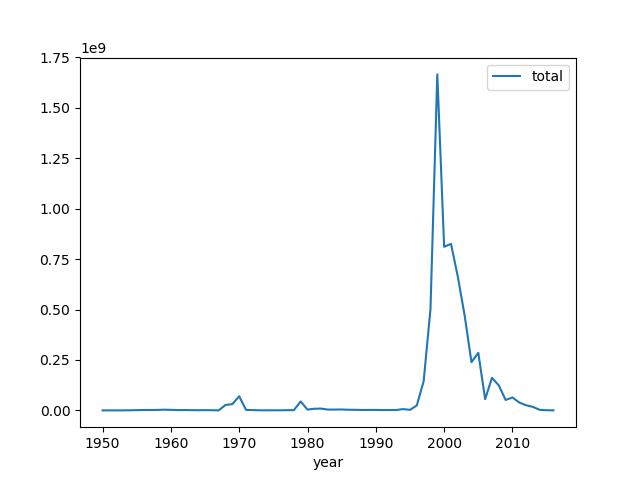

In [134]:
merge_table.plot(label="year")